### CAPSTONE PROJECT - Exploratory Data Analysis

##### **IMPORT PACKAGES**

In [225]:
import pandas as pd
import numpy as np
import random
import datetime
import matplotlib.pyplot as plt

##### **READ DATASET**

In [226]:
df_customer = pd.read_csv('customer.csv')
df_generations = pd.read_csv('generations.csv')
df_pastry_inventory = pd.read_csv('pastry inventory.csv')
df_product = pd.read_csv('product.csv')
df_sales_outlet = pd.read_csv('sales outlet.csv')
df_sales_reciepts = pd.read_csv('sales reciepts.csv')

##### **PROBLEM STATEMENT (Point 5)**

1. Generasi mana yang lebih sering melakukan pembelian?
2. Produk apa yang paling digemari oleh tiap generasi?
3. Bagaimana komposisi gender customer?
4. Apa produk yang disukai oleh masing-masing gender?
5. Apa produk yang paling diminati di setiap homestore?
6. Pendapatan masing-masing homestore perhari?
7. Homestore mana yang penjualannya paling banyak dan homestore mana yang penjualannya paling sedikit?
8. Produk yang bersisa di masing-masing homestore?
9. Bagaimana distribusi produk agar tidak banyak yang terbuang?
10. Apakah konsumen yang sudah berlangganan sejak lama lebih banyak melakukan pembelian?
11. Bagaimana komposisi setiap generasi di tiap homestore?

##### **DATA CLEANSING (Point 30)**

*Pembersihan data df_customer*

In [227]:
df_customer.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951


In [228]:
# memeriksa tipe data setiap kolom df_customer
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   int64 
 1   home_store           2246 non-null   int64 
 2   customer_first-name  2246 non-null   object
 3   customer_email       2246 non-null   object
 4   customer_since       2246 non-null   object
 5   loyalty_card_number  2246 non-null   object
 6   birthdate            2246 non-null   object
 7   gender               2246 non-null   object
 8   birth_year           2246 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 158.0+ KB


In [229]:
# pembersihan data df_customer

# mengubah tipe data menjadi string
columns = ['customer_id', 'home_store']

for column in columns:
  df_customer[column] = df_customer[column].astype(str)

# mengubah tipe data menjadi datetime
cols = ['customer_since', 'birthdate']

for col in cols:
  df_customer[col] = pd.to_datetime(df_customer[col])


In [230]:
# memeriksa tipe data setiap kolom df_customer setelah diubah
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          2246 non-null   object        
 1   home_store           2246 non-null   object        
 2   customer_first-name  2246 non-null   object        
 3   customer_email       2246 non-null   object        
 4   customer_since       2246 non-null   datetime64[ns]
 5   loyalty_card_number  2246 non-null   object        
 6   birthdate            2246 non-null   datetime64[ns]
 7   gender               2246 non-null   object        
 8   birth_year           2246 non-null   int64         
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 158.0+ KB


In [231]:
# memeriksa apakah terdapat missing value 
df_customer.isnull().any() ## tidak terdapat missing value

customer_id            False
home_store             False
customer_first-name    False
customer_email         False
customer_since         False
loyalty_card_number    False
birthdate              False
gender                 False
birth_year             False
dtype: bool

In [232]:
# memeriksa apakah terdapat duplicate
len(df_customer['customer_id'].unique())==len(df_customer) ## tidak terdapat duplicate

True

*Pembersihan data df_generations*

In [233]:
df_generations.head()

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers
3,1949,Baby Boomers
4,1950,Baby Boomers


In [234]:
# memeriksa tipe data setiap kolom df_generations
df_generations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_year  70 non-null     int64 
 1   generation  70 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [235]:
# memeriksa apakah terdapat missing value
df_generations.isnull().any() ## tidak terdapat missing value

birth_year    False
generation    False
dtype: bool

In [236]:
# memeriksa apakah terdapat duplicate
len(df_generations['birth_year'].unique())==len(df_generations) ## tidak terdapat duplicate

True

*Pembersihan data df_pastry_inventory*

In [237]:
df_pastry_inventory.head()

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%


In [238]:
# memeriksa tipe data tiap kolom df_pastry_inventory
df_pastry_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_outlet_id   307 non-null    int64 
 1   transaction_date  307 non-null    object
 2   product_id        307 non-null    int64 
 3   start_of_day      307 non-null    int64 
 4   quantity_sold     307 non-null    int64 
 5   waste             307 non-null    int64 
 6   % waste           307 non-null    object
dtypes: int64(5), object(2)
memory usage: 16.9+ KB


In [239]:
# pembersihan data df_pastry_inventory

# mengubah tipe data menjadi string
cols = ['sales_outlet_id', 'product_id']

for col in cols:
  df_pastry_inventory[col] = df_pastry_inventory[col].astype(str)

# mengubah tipe data menjadi datetime
df_pastry_inventory['transaction_date'] = pd.to_datetime(df_pastry_inventory['transaction_date'])

# menghilangkan karakter % pada kolom '% waste'
df_pastry_inventory['% waste'] = df_pastry_inventory['% waste'].str.replace('%',"")

# mengubah tipe data kolom '% waste' menjadi float
df_pastry_inventory['% waste'] = df_pastry_inventory['% waste'].astype(float) 

In [240]:
# memeriksa tipe data tiap kolom df_pastry_inventory setelah diubah
df_pastry_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sales_outlet_id   307 non-null    object        
 1   transaction_date  307 non-null    datetime64[ns]
 2   product_id        307 non-null    object        
 3   start_of_day      307 non-null    int64         
 4   quantity_sold     307 non-null    int64         
 5   waste             307 non-null    int64         
 6   % waste           307 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 16.9+ KB


In [241]:
# memeriksa apakah terdapat missing value
df_pastry_inventory.isnull().any() ## tidak terdapat missing value

sales_outlet_id     False
transaction_date    False
product_id          False
start_of_day        False
quantity_sold       False
waste               False
% waste             False
dtype: bool

*Pembersihan data df_product*

In [242]:
df_product.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N


In [243]:
# memeriksa tipe data tiap kolom df_product
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               88 non-null     int64  
 1   product_group            88 non-null     object 
 2   product_category         88 non-null     object 
 3   product_type             88 non-null     object 
 4   product                  88 non-null     object 
 5   product_description      88 non-null     object 
 6   unit_of_measure          88 non-null     object 
 7   current_wholesale_price  88 non-null     float64
 8   current_retail_price     88 non-null     object 
 9   tax_exempt_yn            88 non-null     object 
 10  promo_yn                 88 non-null     object 
 11  new_product_yn           88 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 8.4+ KB


In [244]:
# pembersihan data df_product

# mengubah tipe data kolom 'product_id' menjadi string
df_product['product_id'] = df_product['product_id'].astype(str)

# menghilangkan karakter '$' pada kolom 'current_retail_price'
df_product['current_retail_price'] = df_product['current_retail_price'].str.replace('$','')

# mengubah tipe data kolom 'current_retail_price' menjadi float
df_product['current_retail_price'] = df_product['current_retail_price'].astype(float)

In [245]:
# memeriksa tipe data tiap kolom df_product setelah dibersihkan
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               88 non-null     object 
 1   product_group            88 non-null     object 
 2   product_category         88 non-null     object 
 3   product_type             88 non-null     object 
 4   product                  88 non-null     object 
 5   product_description      88 non-null     object 
 6   unit_of_measure          88 non-null     object 
 7   current_wholesale_price  88 non-null     float64
 8   current_retail_price     88 non-null     float64
 9   tax_exempt_yn            88 non-null     object 
 10  promo_yn                 88 non-null     object 
 11  new_product_yn           88 non-null     object 
dtypes: float64(2), object(10)
memory usage: 8.4+ KB


In [246]:
# memeriksa apakah terdapat missing value
df_product.isnull().any() ## tidak terdapat missing value

product_id                 False
product_group              False
product_category           False
product_type               False
product                    False
product_description        False
unit_of_measure            False
current_wholesale_price    False
current_retail_price       False
tax_exempt_yn              False
promo_yn                   False
new_product_yn             False
dtype: bool

In [247]:
# memeriksa apakah terdapat duplicate
len(df_product['product_id'].unique())==len(df_product) ## tidak terdapat duplicate

True

In [248]:
df_product.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,15.00,Y,N,N


*Pembersihan data df_sales_outlet*

In [249]:
df_sales_outlet.head()

,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,972-871-0402,11432,-73.795168,40.705226,NaN,Jamaica
1,3,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,4,retail,1300,604 Union Street,Brooklyn,NY,619-347-5193,11215,-73.983984,40.677645,11.0,Gowanus
3,5,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
4,6,retail,1000,122 E Broadway,New York,NY,613-555-4989,10002,-73.992687,40.713852,21.0,Lower East Side


In [250]:
# memeriksa tipe data tiap kolom df_sales_outlet
df_sales_outlet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sales_outlet_id       9 non-null      int64  
 1   sales_outlet_type     9 non-null      object 
 2   store_square_feet     9 non-null      int64  
 3   store_address         9 non-null      object 
 4   store_city            9 non-null      object 
 5   store_state_province  9 non-null      object 
 6   store_telephone       9 non-null      object 
 7   store_postal_code     9 non-null      int64  
 8   store_longitude       9 non-null      float64
 9   store_latitude        9 non-null      float64
 10  manager               8 non-null      float64
 11  Neighorhood           9 non-null      object 
dtypes: float64(3), int64(3), object(6)
memory usage: 992.0+ bytes


In [251]:
# memeriksa apakah terdapat missing value
df_sales_outlet.isnull().any() # terdapat missing value pada kolom 'manager'

sales_outlet_id         False
sales_outlet_type       False
store_square_feet       False
store_address           False
store_city              False
store_state_province    False
store_telephone         False
store_postal_code       False
store_longitude         False
store_latitude          False
manager                  True
Neighorhood             False
dtype: bool

In [252]:
# memeriksa apakah terdapat duplicate
len(df_sales_outlet['sales_outlet_id'].unique())==len(df_sales_outlet) # tidak terdapat duplicate

True

In [253]:
# pembersihan data df_sales_outlet

# mengubah nama kolom 'Neighorhood' menjadi 'neighborhood'
df_sales_outlet = df_sales_outlet.rename(columns={'Neighorhood':'neighborhood'})

# mengubah tipe data kolom menjadi string
cols = ['sales_outlet_id', 'store_postal_code']

for col in cols:
  df_sales_outlet[col] = df_sales_outlet[col].astype(str)

# mengisi missing value pada kolom 'manager' dengan nilai baris sesudahnya
df_sales_outlet['manager'] = df_sales_outlet['manager'].fillna(method='bfill')

In [254]:
df_sales_outlet.head()

,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,neighborhood
0,2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,972-871-0402,11432,-73.795168,40.705226,6.0,Jamaica
1,3,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,4,retail,1300,604 Union Street,Brooklyn,NY,619-347-5193,11215,-73.983984,40.677645,11.0,Gowanus
3,5,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
4,6,retail,1000,122 E Broadway,New York,NY,613-555-4989,10002,-73.992687,40.713852,21.0,Lower East Side


*Pembersihan data df_sales_receipts*

In [255]:
df_sales_reciepts.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [256]:
# memeriksa tipe data setiap kolom df_sales_reciepts
df_sales_reciepts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49894 non-null  int64  
 1   transaction_date  49894 non-null  object 
 2   transaction_time  49894 non-null  object 
 3   sales_outlet_id   49894 non-null  int64  
 4   staff_id          49894 non-null  int64  
 5   customer_id       49894 non-null  int64  
 6   instore_yn        49894 non-null  object 
 7   order             49894 non-null  int64  
 8   line_item_id      49894 non-null  int64  
 9   product_id        49894 non-null  int64  
 10  quantity          49894 non-null  int64  
 11  line_item_amount  49894 non-null  float64
 12  unit_price        49894 non-null  float64
 13  promo_item_yn     49894 non-null  object 
dtypes: float64(2), int64(8), object(4)
memory usage: 5.3+ MB


In [257]:
# memeriksa apakah terdapat missing value
df_sales_reciepts.isnull().any() # tidak terdapat missing value

transaction_id      False
transaction_date    False
transaction_time    False
sales_outlet_id     False
staff_id            False
customer_id         False
instore_yn          False
order               False
line_item_id        False
product_id          False
quantity            False
line_item_amount    False
unit_price          False
promo_item_yn       False
dtype: bool

In [258]:
def fill_with_random(df2, column):
    df = df2.copy()
    df[column] = df[column].apply(lambda x: np.random.choice(df[column].dropna().values) if np.isnan(x) else x)
    return df

In [259]:
# mengubah tipe data menjadi string
cols = ['transaction_id', 'sales_outlet_id', 'staff_id','line_item_id', 'product_id']

for col in cols:
  df_sales_reciepts[cols] = df_sales_reciepts[cols].astype(str)

# mengubah tipe data kolom 'transaction_date' menjadi datetime
df_sales_reciepts['transaction_date'] = pd.to_datetime(df_sales_reciepts['transaction_date'])

# mengubah tipe data kolom 'transaction_time'
df_sales_reciepts['transaction_time'] = pd.to_datetime(df_sales_reciepts['transaction_time'])

# terdapat customer_id = 0 pada kolom 'customer_id' akan dipilih nilai random melalui nilai yang sudah tersedia untuk menggantikan nilai 0 tersebut
df_sales_reciepts['customer_id'] = df_sales_reciepts['customer_id'].replace({0:np.nan})
df_sales_reciepts = fill_with_random(df_sales_reciepts, 'customer_id')

# mengubah tipe data kolom 'customer_id' jadi string
df_sales_reciepts['customer_id'] = df_sales_reciepts['customer_id'].astype(int)
df_sales_reciepts['customer_id'] = df_sales_reciepts['customer_id'].astype(str)
                                                                      


In [260]:
df_sales_reciepts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    49894 non-null  object        
 1   transaction_date  49894 non-null  datetime64[ns]
 2   transaction_time  49894 non-null  datetime64[ns]
 3   sales_outlet_id   49894 non-null  object        
 4   staff_id          49894 non-null  object        
 5   customer_id       49894 non-null  object        
 6   instore_yn        49894 non-null  object        
 7   order             49894 non-null  int64         
 8   line_item_id      49894 non-null  object        
 9   product_id        49894 non-null  object        
 10  quantity          49894 non-null  int64         
 11  line_item_amount  49894 non-null  float64       
 12  unit_price        49894 non-null  float64       
 13  promo_item_yn     49894 non-null  object        
dtypes: datetime64[ns](2), 

In [261]:
# memeriksa tipe data setiap kolom df_sales_reciepts setelah diubah
df_sales_reciepts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    49894 non-null  object        
 1   transaction_date  49894 non-null  datetime64[ns]
 2   transaction_time  49894 non-null  datetime64[ns]
 3   sales_outlet_id   49894 non-null  object        
 4   staff_id          49894 non-null  object        
 5   customer_id       49894 non-null  object        
 6   instore_yn        49894 non-null  object        
 7   order             49894 non-null  int64         
 8   line_item_id      49894 non-null  object        
 9   product_id        49894 non-null  object        
 10  quantity          49894 non-null  int64         
 11  line_item_amount  49894 non-null  float64       
 12  unit_price        49894 non-null  float64       
 13  promo_item_yn     49894 non-null  object        
dtypes: datetime64[ns](2), 

**EXPLORATORY DATA (Point 25)**

a. Generasi mana yang lebih sering melakukan pembelian?

In [262]:
# merge tabel df_customer, df_generations, df_sales_reciepts
df_customer_generations = df_customer.merge(df_generations, how='inner', on='birth_year')
df_sales_reciepts_customer_generations = df_sales_reciepts.merge(df_customer_generations[['customer_id','generation']], how='left', on='customer_id')

In [263]:
# melihat apakah ada null
df_sales_reciepts_customer_generations.isnull().sum()

# Terdapat null data. Hal ini terjadi karena terdapat beberapa customer_id yang terdapat pada data customer.csv. 
# Untuk mengatasi missing value, missing value akan diisi dengan modus

transaction_id       0
transaction_date     0
transaction_time     0
sales_outlet_id      0
staff_id             0
customer_id          0
instore_yn           0
order                0
line_item_id         0
product_id           0
quantity             0
line_item_amount     0
unit_price           0
promo_item_yn        0
generation          17
dtype: int64

In [264]:
# mengisi nilai null
df_sales_reciepts_customer_generations['generation'] = df_sales_reciepts_customer_generations['generation'].fillna('Baby Boomers')

In [265]:
# melakukan groupby berdasarkan 'generation'
df1 = df_sales_reciepts_customer_generations.groupby(by='generation').count()[['transaction_id']]

# mengubah nama kolom dan mengurutkan
df1 = df1.rename(columns={'transaction_id':'banyak_transaksi'}).sort_values('banyak_transaksi', ascending=False)
df1

,banyak_transaksi
generation,
Baby Boomers,12158
Gen X,11450
Older Millennials,10982
Gen Z,8464
Younger Millennials,6840


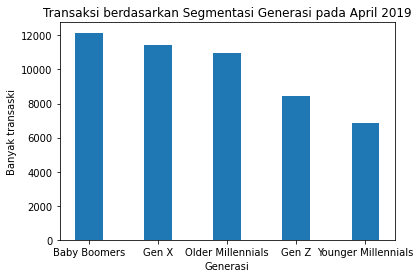

In [266]:
# plot

xpos = np.arange(start=0, stop=10, step=2 )
plt.bar(xpos, df1['banyak_transaksi'])
plt.xticks(xpos, list(df1.index))
plt.xlabel('Generasi')
plt.ylabel('Banyak transaski')
plt.title('Transaksi berdasarkan Segmentasi Generasi pada April 2019')
plt.savefig('a.png', dpi=500, bbox_inches='tight')

b. Produk apa yang paling digemari oleh tiap generasi?

In [267]:
# merge tabel df_sales_receipts_customer_generations dengan df_product
df_sales_reciepts_generations_product = df_sales_reciepts_customer_generations.merge(df_product, how='left', on='product_id')

In [268]:
# melakukan groupby berdasarkan kolom 'generation' dan 'product'
df2 = df_sales_reciepts_generations_product.groupby(['generation', 'product'])[['quantity']].sum()

In [269]:
# produk yang paling disukai generasi Baby Boomers
df2.loc['Baby Boomers'].sort_values(by='quantity', ascending=False).nlargest(10,'quantity')

,quantity
product,
Dark chocolate Lg,395
Latte Rg,394
Latte,391
Earl Grey Rg,389
Cappuccino,387
Our Old Time Diner Blend Sm,385
Columbian Medium Roast Sm,378
Traditional Blend Chai Rg,375
Cappuccino Lg,375


In [270]:
# produk yang paling disukai generasi Gen X
df2.loc['Gen X'].sort_values(by='quantity', ascending=False).nlargest(10,'quantity')

,quantity
product,
Lemon Grass Lg,383
Sustainably Grown Organic Lg,374
Ethiopia Sm,372
Sustainably Grown Organic Rg,367
Our Old Time Diner Blend Rg,366
Earl Grey Rg,365
Columbian Medium Roast Rg,364
Dark chocolate Lg,358
Jamaican Coffee River Lg,357


In [271]:
# produk yang paling disukai generasi Older Millenials
df2.loc['Older Millennials'].sort_values(by='quantity', ascending=False).nlargest(10,'quantity')

,quantity
product,
Morning Sunrise Chai Rg,384
Jamaican Coffee River Lg,370
Ethiopia Sm,361
Peppermint Lg,358
Serenity Green Tea Rg,354
Latte,350
Columbian Medium Roast Lg,349
Sustainably Grown Organic Rg,344
Columbian Medium Roast Rg,343


In [272]:
# produk yang paling disukai generasi Gen Z
df2.loc['Gen Z'].sort_values(by='quantity', ascending=False).nlargest(10,'quantity')

,quantity
product,
Brazilian Rg,291
Morning Sunrise Chai Lg,286
Dark chocolate Lg,285
Ethiopia Rg,280
Peppermint Rg,276
Spicy Eye Opener Chai Rg,271
Earl Grey Rg,266
Serenity Green Tea Rg,266
Jamaican Coffee River Sm,263


In [273]:
# produk yang paling disukai generasi Gen Z
df2.loc['Younger Millennials'].sort_values(by='quantity', ascending=False).nlargest(10,'quantity')

,quantity
product,
Earl Grey Rg,228
Serenity Green Tea Rg,226
Ethiopia Sm,224
Brazilian Sm,220
Ethiopia Rg,220
Sustainably Grown Organic Lg,219
Peppermint Rg,215
Morning Sunrise Chai Rg,213
Morning Sunrise Chai Lg,207


c. Bagaimana komposisi gender customer?

In [274]:
# merge dataframe yang diperlukan
df4 = df_sales_reciepts_customer_generations.merge(df_customer[['customer_id','gender']], how='left', on='customer_id')

In [275]:
# mengisi field 'gender' yang terdapat null dengan modul
df4['gender'] = df4['gender'].fillna('F')

In [276]:
# melakukan groupby
df4a = pd.DataFrame(df4.groupby('gender')['transaction_id'].count())
df4a

,transaction_id
gender,
F,21778
M,16682
N,11434


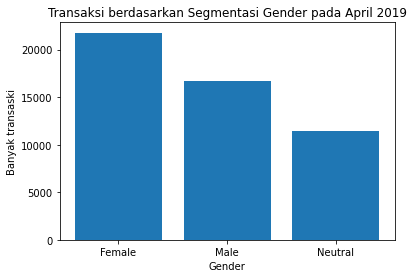

In [277]:
# plot
xpos = np.arange(start=0, stop=3, step=1)
plt.bar(xpos, df4a['transaction_id'])
plt.xticks(xpos, ['Female', 'Male', 'Neutral'], )
plt.xlabel('Gender')
plt.ylabel('Banyak transaski')
plt.title('Transaksi berdasarkan Segmentasi Gender pada April 2019')
plt.savefig('c.png', dpi=500)

d. Apa produk yang disukai oleh masing-masing gender?

In [278]:
# merge dataframe yang diperlukan
df5 = df4.merge(df_product, how='left', on='product_id')

In [279]:
# melakukan groupby
df5_group = df5.groupby(['gender', 'product'])[['quantity']].sum()

In [280]:
# kategori produk yang disukai wanita
df5_group.loc['F'].sort_values(by='quantity', ascending=False).nlargest(10,'quantity')

,quantity
product,
Dark chocolate Lg,703
Sustainably Grown Organic Lg,701
Earl Grey Rg,699
Jamaican Coffee River Lg,676
Latte Rg,672
Cappuccino,669
Serenity Green Tea Rg,667
Brazilian Sm,664
Our Old Time Diner Blend Rg,663


In [281]:
# kategori produk yang disukai pria
df5_group.loc['M'].sort_values(by='quantity', ascending=False).nlargest(10,'quantity')

,quantity
product,
Traditional Blend Chai Rg,535
Spicy Eye Opener Chai Lg,519
Morning Sunrise Chai Rg,519
Latte Rg,514
Brazilian Rg,513
Serenity Green Tea Rg,509
Peppermint Rg,509
Ethiopia Rg,507
Espresso shot,504


In [282]:
# kategori produk yang disukai gender N
df5_group.loc['N'].sort_values(by='quantity', ascending=False).nlargest(10,'quantity')

,quantity
product,
Morning Sunrise Chai Rg,394
Dark chocolate Lg,381
Columbian Medium Roast Rg,378
Latte,376
Earl Grey Rg,376
Ethiopia Rg,362
Traditional Blend Chai Lg,360
Lemon Grass Rg,355
English Breakfast Rg,353


e. Produk yang paling diminati di setiap homestore

In [283]:
# merge tabel df_sales_reciepts, df_product, df_sales_outlet
df_sales_reciepts_product = df_sales_reciepts.merge(df_product, how='left', on='product_id')
df_sales_reciepts_product_outlet = df_sales_reciepts_product.merge(df_sales_outlet, how='left', on='sales_outlet_id')

In [284]:
# melakukan groupby berdasarkan kolom 'sales_outlet_id' dan 'product'
df5 = df_sales_reciepts_product_outlet.groupby(by=['sales_outlet_id', 'product'])[['quantity']].sum()

In [285]:
 # 10 produk teratas di homestore 3
 df5.loc['3'].sort_values(by='quantity', ascending=False).nlargest(10,'quantity')

,quantity
product,
Earl Grey Rg,576
Dark chocolate Lg,568
Peppermint Rg,557
Latte,539
Sustainably Grown Organic Lg,534
Jamaican Coffee River Rg,531
Morning Sunrise Chai Lg,530
Ethiopia Sm,527
Spicy Eye Opener Chai Lg,523


In [286]:
 # 10 produk teratas di homestore 5
 df5.loc['5'].sort_values(by='quantity', ascending=False).nlargest(10,'quantity')

,quantity
product,
Ethiopia Rg,512
Ethiopia Sm,510
Latte,507
Morning Sunrise Chai Rg,507
Cappuccino Lg,506
Peppermint Lg,505
Columbian Medium Roast Rg,501
Jamaican Coffee River Lg,501
English Breakfast Rg,501


In [287]:
 # 10 produk teratas di homestore 8
 df5.loc['8'].sort_values(by='quantity', ascending=False).nlargest(10,'quantity')

,quantity
product,
Ouro Brasileiro shot,629
Ethiopia Lg,531
English Breakfast Lg,519
Brazilian Sm,517
Our Old Time Diner Blend Sm,517
Serenity Green Tea Rg,516
Traditional Blend Chai Rg,511
Ethiopia Rg,509
Sustainably Grown Organic Lg,508


f. Pendapatan masing-masing homestore perhari

In [288]:
# menghitung harga total dari tiap transaksi
df_sales_reciepts['total_harga'] = df_sales_reciepts['quantity']*df_sales_reciepts['unit_price']

In [289]:
# melakukan
df6 = pd.DataFrame(df_sales_reciepts.groupby(['sales_outlet_id','transaction_date'])[['total_harga']].sum())

In [290]:
# pendapatan harian selama bulan April homestore 3
df6.loc['3']['total_harga']

transaction_date
2019-04-01    2571.40
2019-04-02    2701.50
2019-04-03    2759.05
2019-04-04    2511.75
2019-04-05    2669.55
2019-04-06    1985.25
2019-04-07    2271.75
2019-04-08    3100.63
2019-04-09    2353.06
2019-04-10    2557.40
2019-04-11    2332.35
2019-04-12    1858.28
2019-04-13    2053.80
2019-04-14    2440.03
2019-04-15    3542.96
2019-04-16    3115.23
2019-04-17    3235.50
2019-04-18    3154.87
2019-04-19    3540.21
2019-04-20    2560.98
2019-04-21    2423.33
2019-04-22    2652.60
2019-04-23    2707.85
2019-04-24    3082.80
2019-04-25    2515.50
2019-04-26    2959.45
2019-04-27    2666.80
2019-04-28    2540.75
2019-04-29    2618.10
Name: total_harga, dtype: float64

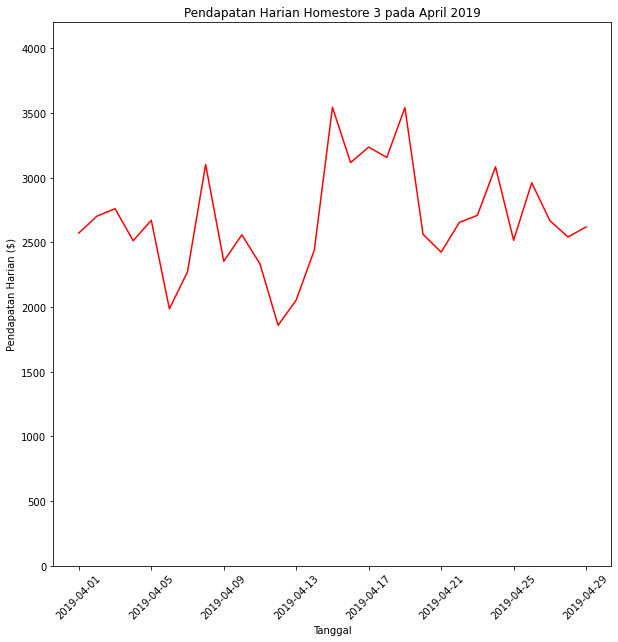

In [291]:
# plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(df6.loc['3']['total_harga'], color='red')
plt.xticks(rotation=45)
plt.ylabel('Pendapatan Harian ($)')
plt.xlabel('Tanggal')
plt.ylim(0,4200)
plt.title('Pendapatan Harian Homestore 3 pada April 2019')
plt.savefig('3.png', dpi=500)

In [292]:
# pendapatan harian selama bulan April homestore 5
df6.loc['5']

,total_harga
transaction_date,
2019-04-01,2330.45
2019-04-02,2090.00
2019-04-03,2281.85
2019-04-04,2238.85
2019-04-05,2292.20
2019-04-06,2214.20
2019-04-07,2513.83
2019-04-08,2832.70
2019-04-09,3004.42


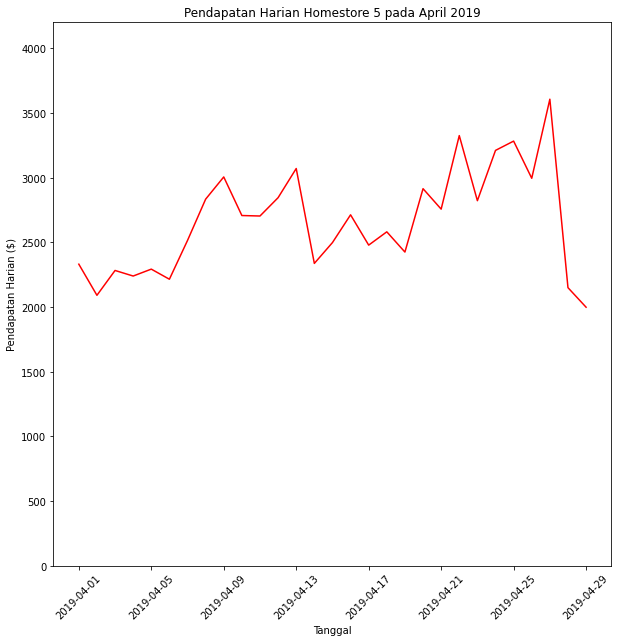

In [293]:
# plot 
# plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(df6.loc['5']['total_harga'], color='red')
plt.xticks(rotation=45)
plt.ylabel('Pendapatan Harian ($)')
plt.xlabel('Tanggal')
plt.ylim(0,4200)
plt.title('Pendapatan Harian Homestore 5 pada April 2019')
plt.savefig('5.png', dpi=500)

In [294]:
# pendapatan harian selama bulan April homestore 8
df6.loc['8']

,total_harga
transaction_date,
2019-04-01,2560.15
2019-04-02,2477.60
2019-04-03,2420.35
2019-04-04,2335.85
2019-04-05,2274.50
2019-04-06,2314.30
2019-04-07,2946.65
2019-04-08,2928.96
2019-04-09,3022.25


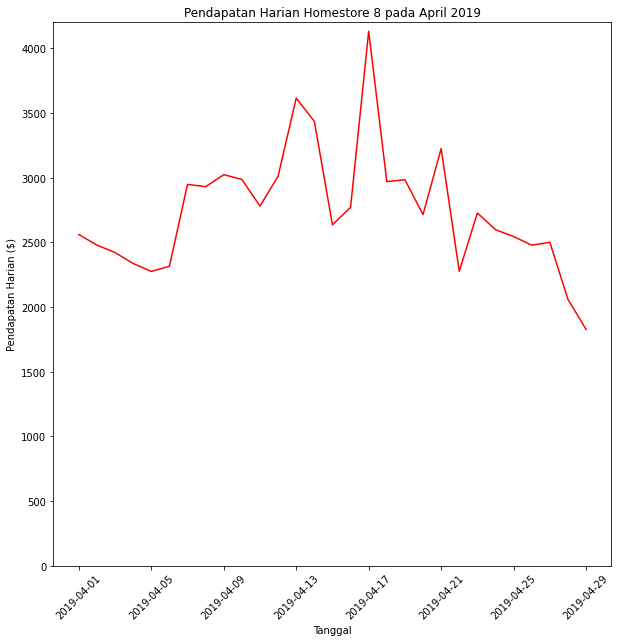

In [295]:
# plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(df6.loc['8']['total_harga'], color='red')
plt.xticks(rotation=45)
plt.ylabel('Pendapatan Harian ($)')
plt.xlabel('Tanggal')
plt.ylim(0,4200)
plt.title('Pendapatan Harian Homestore 8 pada April 2019')
plt.savefig('8.png', dpi=500)

g. Homestore mana yang penjualannya paling banyak dan homestore mana yang penjualannya paling sedikit

In [296]:
# melakukan groupby
df7 = pd.DataFrame(df_sales_reciepts.groupby('sales_outlet_id')[['total_harga']].sum())
df7 = df7.rename(columns={'total_harga':'total_pendapatan'})

In [297]:
df7

,total_pendapatan
sales_outlet_id,
3,77482.73
5,77200.57
8,79528.25


In [298]:
total_pendapatan = list(df7['total_pendapatan'])

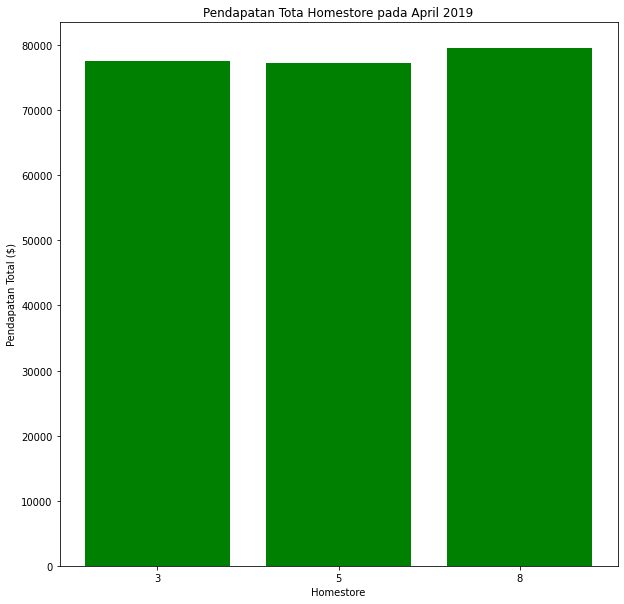

In [299]:
# plot

fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(df7.index, total_pendapatan, color='green')
plt.ylabel('Pendapatan Total ($)')
plt.xlabel('Homestore')
plt.title('Pendapatan Tota Homestore pada April 2019')
plt.savefig('gabungan.png', dpi=500)

h. Produk yang bersisa di masing-masing homestore?

In [300]:
# merge dataframe yang diperlukan
df_pastry_inventory_product = df_pastry_inventory.merge(df_product, how='left', on='product_id')

In [301]:
# melakukan groupby
df8 = df_pastry_inventory_product.groupby(['sales_outlet_id','product'])[['start_of_day', 'quantity_sold', 'waste']].sum()

In [302]:
df8['waste_percentage (max 1)'] = df8['waste']/df8['start_of_day']

In [303]:
df8

start_of_day  ...  waste_percentage (max 1)
sales_outlet_id product                            ...                          
3               Almond Croissant              324  ...                  0.558642
                Chocolate Croissant           342  ...                  0.540936
                Cranberry Scone               342  ...                  0.587719
                Ginger Scone                  960  ...                  0.746875
                Hazelnut Biscotti             378  ...                  0.484127
5               Almond Croissant              378  ...                  0.552910
                Chocolate Croissant           378  ...                  0.552910
                Cranberry Scone               378  ...                  0.568783
                Ginger Scone                 1008  ...                  0.741071
                Hazelnut Biscotti             378  ...                  0.555556
8               Almond Croissant              378  ...                  0.555556
                Chocolate Croissant           378  ...                  0.489418
                Cranberry Scone               378  ...                  0.476190
                Ginger Scone                 1008  ...                  0.670635
                Hazelnut Biscotti             378  ...                  0.507937

[15 rows x 4 columns]

i. Apakah konsumen yang sudah berlangganan sejak lama lebih banyak melakukan pembelian?

In [304]:
# merge dataframe
df_sales_reciepts_customer = df_sales_reciepts.merge(df_customer, how='left', on='customer_id')

In [305]:
# terdapat beberapa customer yang tidak teridentifikasi customer_id
df_sales_reciepts_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49894 entries, 0 to 49893
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transaction_id       49894 non-null  object        
 1   transaction_date     49894 non-null  datetime64[ns]
 2   transaction_time     49894 non-null  datetime64[ns]
 3   sales_outlet_id      49894 non-null  object        
 4   staff_id             49894 non-null  object        
 5   customer_id          49894 non-null  object        
 6   instore_yn           49894 non-null  object        
 7   order                49894 non-null  int64         
 8   line_item_id         49894 non-null  object        
 9   product_id           49894 non-null  object        
 10  quantity             49894 non-null  int64         
 11  line_item_amount     49894 non-null  float64       
 12  unit_price           49894 non-null  float64       
 13  promo_item_yn        49894 non-

In [306]:
# drop data null
df_sales_receipts_customer_no_null = df_sales_reciepts_customer.dropna()

In [307]:
df_sales_receipts_customer_no_null['lama_berlangganan'] = datetime.datetime(2019,4,1) - df_sales_receipts_customer_no_null['customer_since']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [308]:
filter = df_sales_receipts_customer_no_null['lama_berlangganan'] < '365 days'

banyak_baru = len(df_sales_receipts_customer_no_null[filter])
banyak_lama = len(df_sales_receipts_customer_no_null[~filter])

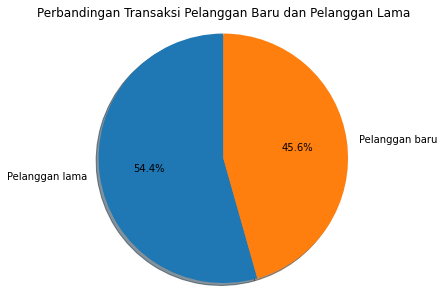

In [309]:
# plot

label = ['Pelanggan lama', 'Pelanggan baru']
size = [banyak_lama, banyak_baru]

fig, ax = plt.subplots(figsize=(5,5))
ax.pie(size, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')
plt.title('Perbandingan Transaksi Pelanggan Baru dan Pelanggan Lama')
plt.savefig('lama_baru.png', dpi=500)

plt.show()

j. Bagaimana komposisi generasi di setiap homestore?

In [339]:
df10 = pd.DataFrame(df_sales_reciepts_customer_generations.groupby(['sales_outlet_id', 'generation'])['customer_id'].count())

In [343]:
baby_boomers = [4551, 3339, 4268]
gen_x = [4339, 3284, 3827]
gen_z = [2445, 2875, 3144]
old_mil = [3548, 4135, 3299]
young_mil = [1946, 2361, 2533]

X = np.arange(0, 6, 2)

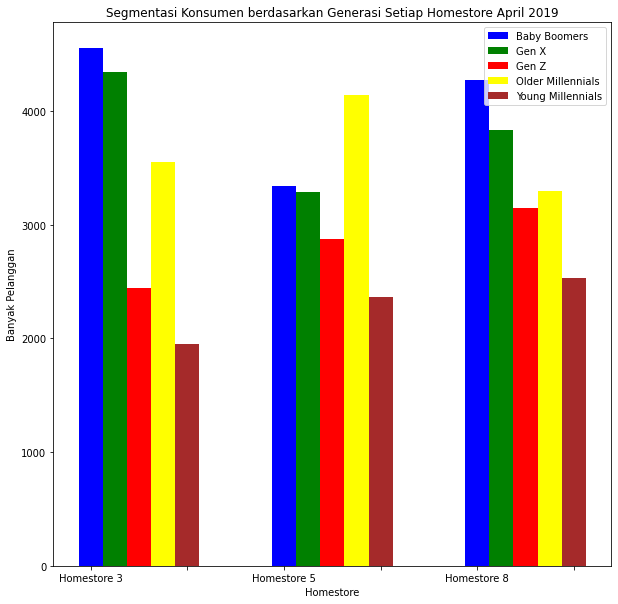

In [361]:
#plot
fig, ax = plt.subplots(figsize=(10,10))

ax.bar(X + 0.00, baby_boomers, color = 'blue', width = 0.25, label='Baby Boomers')
ax.bar(X + 0.25, gen_x, color = 'green', width = 0.25, label='Gen X')
ax.bar(X + 0.50, gen_z, color = 'red', width = 0.25, label = 'Gen Z')
ax.bar(X + 0.75, old_mil, color = 'yellow', width = 0.25, label = 'Older Millennials')
ax.bar(X + 1, young_mil, color = 'brown', width = 0.25, label = 'Young Millennials')

x_label = [' ','Homestore 3',' ','Homestore 5',' ','Homestore 8']

ax.set_xticklabels(x_label)
plt.xlabel('Homestore')
plt.ylabel('Banyak Pelanggan')
plt.title('Segmentasi Konsumen berdasarkan Generasi Setiap Homestore April 2019')
plt.legend()
plt.savefig('gen_store.png', dpi=500)


**REKOMENDASI (Point 10)**

1. Suplai bulanan produk 'Ginger Scone' dikurangi karena di semua homestore produk ini memiliki persentase waste yang besar, lebih dari 70%.
2. Di homestore 3, pelanggan dari generasi Baby Boomers (kelahiran 1946-1964) lebih banyak. Suplai produk Dark Chocolate Lg, Latte Rg, dan Latte sebaiknya ditingkatkan. Konsumen dari kalangan Gen X (kelahiran 1965-1979) juga tidak selisih jauh sehingga suplai produk Lemon Grass Lg, Sustainably Grown Organic Lg, dan Ethiopia Sm juga perlu ditambah.
3. Di homestore 5, generasi Older Millennials (kelahiran 1980-1989). Suplai produk Morning Sunrise Chai Rg, Jamaican Coffee River Lg, dan Ethiopia Sm ditingkatkan.
4. Di homestore 8, pelanggan dari generasi Baby Boomers juga lebih banyak. Suplai produk Dark Chocolate Lg, Latte Rg, dan Latte direkomendasikan untuk ditambah.
5. Berdasarkan data, secara umum dapat dilihat bahwa generasi Baby Boomers lebih senang ke homestore toko kopi dibandingkan generasi lainnya. Pihak homestore toko kopi disarankan untuk membuat fasilitas yang nyaman untuk konsumen dari generasi ini agar terjadi penambahan revenue

**KESIMPULAN - Create the story (Point 10)**

1. Berdasarkan data penjualan di seluruh homestore pada April 2019, pelanggan dari generasi Baby Boomers (kelahiran 1946-1964) lebih sering melakukan pembelian.

2. Produk yang paling sering dibeli generasi Baby Boomers: Dark Chocolate Lg
Produk yang paling sering dibeli generasi Gen X = Lemon Grass Lg
Produk yang paling sering dibeli generasi Older Millennials  = Morning Sunrise Chai Rg
Produk yang paling sering dibeli generasi Gen Z = Brazilian Rg
Produk yang paling sering dibeli generasi Younger Millennials = Earl Grey Rg

3. Berdasarkan data penjualan di seluruh homestore pada April 2019, kebanyakan pelanggan adalah wanita.

4. Produk yang disukai wanita = Dark Chocolate Lg
Produk yang disukai pria = Traditional Blend Chai Rg
Produk yang disukai gender N = Morning Sunrise Chai Rg

5. Produk yang paling diminati di homestore 3 = Earls Grey Rg
Produk yang paling diminati di homestore 5 = Ethiopia Rg
Produk yang paling diminati di homestore 8 = Ouro Brasileiro Shot

6. Homestore dengan penjualan terbanyak pada April 2019 = Homestore 8
Homestore dengan penjual terkecil pada April 2019 = Homestore 5

7. Produk yang paling banyak bersisa di semua homestore = Ginger Scone.

8. Berdasarkan data penjualan di seluruh homestore pada April 2019, pelanggan yang sudah berlangganan lama (lebih dari 1 tahun) lebih banyak melakukan pembelian.

9. Segmentasi generasi terbanyak di homestore 3 = Baby Boomers
Segmentasi generasi terbanyak di homestore 5 = Older Millennials
Segmentasi generasi terbanyak di homestore 8 = Baby Boomers


